# Lab 7.1: Cleaning and Wrangling Data with Automobile Dataset

For this dataset, we will try to build a model to determine the price of a vehicle. For this lab, we will complete the data cleaning and exploratory data analysis required to build our model. Cleaning the dataset and identifying features which relate to vehicle price is critical to building a model to answer our question. A future lab will use our findings here to actually create the model. This notebook contains part 1 of this lab and is worth 4 points.

**Rubric**
- 4 points: Complete the Jupyter Notebook as described. Analysis and written portions are completed in a professional manner. Use complete sentences and correct grammar.
- 3 points: Completes only some of the Jupyter Notebook as described, or submission does not meet professionalism standards.
- 2 points: Missing or incomplete

## Getting the data 
For this lab we are using the automobile dataset from [UC Irving's Machine Learning Repository](https://archive.ics.uci.edu/dataset/10/automobile). This dataset should be available in your GitHub repository as `automobile.csv`.

Import `pandas` and use `.read_csv()` to create your dataframe.

In [540]:
import pandas as pd
import numpy as np
a=pd.read_csv('automobile.csv')
a

symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            1                NaN  alfa-romero       gas        std   
2            2              164.0         audi       gas        std   
3            2              164.0         audi       gas        std   
4            2                NaN         audi       gas        std   
..         ...                ...          ...       ...        ...   
195         -1               95.0        volvo       gas        std   
196         -1               95.0        volvo       gas      turbo   
197         -1               95.0        volvo       gas        std   
198         -1               95.0        volvo    diesel      turbo   
199         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
2           four        sedan          fwd           front        99.8  ...   
3           four        sedan          4wd           front        99.4  ...   
4            two        sedan          fwd           front        99.8  ...   
..           ...          ...          ...             ...         ...  ...   
195         four        sedan          rwd           front       109.1  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            152         mpfi  2.68    3.47               9.0      154.0   
2            109         mpfi  3.19    3.40              10.0      102.0   
3            136         mpfi  3.19    3.40               8.0      115.0   
4            136         mpfi  3.19    3.40               8.5      110.0   
..           ...          ...   ...     ...               ...        ...   
195          141         mpfi  3.78    3.15               9.5      114.0   
196          141         mpfi  3.78    3.15               8.7      160.0   
197          173         mpfi  3.58    2.87               8.8      134.0   
198          145          idi  3.01    3.40              23.0      106.0   
199          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg  price  
0      5000.0       21           27  16500  
1      5000.0       19           26  16500  
2      5500.0       24           30  13950  
3      5500.0       18           22  17450  
4      5500.0       19           25  15250  
..        ...      ...          ...    ...  
195    5400.0       23           28  16845  
196    5300.0       19           25  19045  
197    5500.0       18           23  21485  
198    4800.0       26           27  22470  
199    5400.0       19           25  22625  

[200 rows x 26 columns]

To make sure your dataframe is correct, list the columns of your dataframe.

In [541]:
a.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Data cleaning and wrangling
Looking at our dataset, we can see several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

So, how do we identify all those missing values and deal with them?

Steps for working with missing data:
1. Identify missing data
2. Deal with missing data
3. Correct data format

### Identify and handle missing values
#### Identify missing values
##### Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?".
We replace "?" with numpy's NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: `.replace(A, B, inplace = True)` to replace A by B.


In [542]:
a.replace('?', 'NaN', inplace = True)

##### Evaluating for missing data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:
- `.isnull()`
- `.notnull()`

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.
"True" means the value is a missing value while "False" means the value is not a missing value.

In [543]:
a.isnull()

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False               True  False      False       False         False   
1        False               True  False      False       False         False   
2        False              False  False      False       False         False   
3        False              False  False      False       False         False   
4        False               True  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
195      False              False  False      False       False         False   
196      False              False  False      False       False         False   
197      False              False  False      False       False         False   
198      False              False  False      False       False         False   
199      False              False  False      False       False         False   

     body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0         False         False            False       False  ...        False   
1         False         False            False       False  ...        False   
2         False         False            False       False  ...        False   
3         False         False            False       False  ...        False   
4         False         False            False       False  ...        False   
..          ...           ...              ...         ...  ...          ...   
195       False         False            False       False  ...        False   
196       False         False            False       False  ...        False   
197       False         False            False       False  ...        False   
198       False         False            False       False  ...        False   
199       False         False            False       False  ...        False   

     fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          False  False   False              False       False     False   
1          False  False   False              False       False     False   
2          False  False   False              False       False     False   
3          False  False   False              False       False     False   
4          False  False   False              False       False     False   
..           ...    ...     ...                ...         ...       ...   
195        False  False   False              False       False     False   
196        False  False   False              False       False     False   
197        False  False   False              False       False     False   
198        False  False   False              False       False     False   
199        False  False   False              False       False     False   

     city-mpg  highway-mpg  price  
0       False        False  False  
1       False        False  False  
2       False        False  False  
3       False        False  False  
4       False        False  False  
..        ...          ...    ...  
195     False        False  False  
196     False        False  False  
197     False        False  False  
198     False        False  False  
199     False        False  False  

[200 rows x 26 columns]

##### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method `.value_counts()` counts the number of "True" values. 


In [544]:
a.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Based on the summary above, each column has 200 rows of data and six of the columns containing missing data:
- `normalized-losses`: 
- `num-of-doors`: 
- `bore`: 
- `stroke`: 
- `horsepower`:
- `peak-rpm`: 

#### Deal with missing data
How to deal with missing data?

1. Drop data
    1. Drop the whole row
    2. Drop the whole column
2. Replace data
    1. Replace it by mean
    2. Replace it by frequency
    3. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

1. Replace by mean:
- `normalized-losses`: 36 missing data
- `bore`: 4 missing data 
- `stroke`: 4 missing data 
- `horsepower`: 2 missing data 
- `peak-rpm`: 2 missing data

2. Replace by frequency:
- `num-of-doors`: 2 missing data - *84% sedans is four doors. Since four doors is most frequent, it is most likely to occur*

Calculate the mean value for the "normalized-losses" column

In [545]:
b = a['normalized-losses'].mean()

Replace "NaN" with mean value in "normalized-losses" column. You can use `.replace()` for `.fillna()`.

In [546]:
a['normalized-losses'].fillna(b, inplace = True)
a.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Calculate the mean value for the "bore" column. Then, replace "NaN" with the mean value in the "bore" column.

In [547]:
b = a['bore'].mean()
a['bore'].fillna(b, inplace = True)
a.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Calculate the mean value for the "stroke" column. Replace NaN in "stroke" column with the mean value.

In [548]:
b = a['stroke'].mean()
a['stroke'].fillna(b, inplace = True)
a.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Calculate the mean value for the "horsepower" column. Replace "NaN" with the mean value in the "horsepower" column.


In [549]:
b = a['horsepower'].mean()
a['horsepower'].fillna(b, inplace = True)
a.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Calculate the mean value for "peak-rpm" column. Replace "NaN" with the mean value in the "peak-rpm" column.

In [550]:
b = a['peak-rpm'].mean()
a['peak-rpm'].fillna(b, inplace = True)
a.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

For "num-of-doors", we want to replace it with the most common value. To see which values are present in a particular column, we can use the `.value_counts()` function:

In [551]:
a['num-of-doors'].value_counts()

num-of-doors
four    113
two      85
Name: count, dtype: int64

We can see that four doors are the most common type. We can also use the `.idxmax()` function with `.value_counts()` to calculate the most common type automatically:


In [552]:
b = a['num-of-doors'].value_counts().idxmax()

Now replace the null values in "num-of-doors" with the most common value.  

In [553]:
a.fillna(b, inplace=True)
a['num-of-doors'].value_counts()

num-of-doors
four    115
two      85
Name: count, dtype: int64

**Great!** Now, we have a dataset with no missing values.

### Correct data format
We are almost there! The last step is checking and making sure that all data is in the correct format (int, float, text or other).
In pandas, we use:
- `.dtype()` to check the data type
- `.astype()` to change the data type

Let's list the data types for each column. Verify that the data types make sense with the [documentation](https://archive.ics.uci.edu/dataset/10/automobile). If not, change the data types.

In [554]:
a.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


### Data Standardization

Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)

**What is standardization?**
Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.>We will need to apply data transformation to transform mpg into L/100km. 

The formula for unit conversion is: L/100km = 235 / mpg.

Use pandas to create the column `city-L/100km` and `highway-L/100km`.

In [555]:
a['city-L/100km'] = 235/a['city-mpg']
a['highway-L/100km'] = 235/a['highway-mpg']
a

symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            1              122.0  alfa-romero       gas        std   
2            2              164.0         audi       gas        std   
3            2              164.0         audi       gas        std   
4            2              122.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
195         -1               95.0        volvo       gas        std   
196         -1               95.0        volvo       gas      turbo   
197         -1               95.0        volvo       gas        std   
198         -1               95.0        volvo    diesel      turbo   
199         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
2           four        sedan          fwd           front        99.8  ...   
3           four        sedan          4wd           front        99.4  ...   
4            two        sedan          fwd           front        99.8  ...   
..           ...          ...          ...             ...         ...  ...   
195         four        sedan          rwd           front       109.1  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   

     bore  stroke  compression-ratio  horsepower peak-rpm city-mpg  \
0    3.47    2.68                9.0       111.0   5000.0       21   
1    2.68    3.47                9.0       154.0   5000.0       19   
2    3.19    3.40               10.0       102.0   5500.0       24   
3    3.19    3.40                8.0       115.0   5500.0       18   
4    3.19    3.40                8.5       110.0   5500.0       19   
..    ...     ...                ...         ...      ...      ...   
195  3.78    3.15                9.5       114.0   5400.0       23   
196  3.78    3.15                8.7       160.0   5300.0       19   
197  3.58    2.87                8.8       134.0   5500.0       18   
198  3.01    3.40               23.0       106.0   4800.0       26   
199  3.78    3.15                9.5       114.0   5400.0       19   

     highway-mpg  price  city-L/100km  highway-L/100km  
0             27  16500     11.190476         8.703704  
1             26  16500     12.368421         9.038462  
2             30  13950      9.791667         7.833333  
3             22  17450     13.055556        10.681818  
4             25  15250     12.368421         9.400000  
..           ...    ...           ...              ...  
195           28  16845     10.217391         8.392857  
196           25  19045     12.368421         9.400000  
197           23  21485     13.055556        10.217391  
198           27  22470      9.038462         8.703704  
199           25  22625     12.368421         9.400000  

[200 rows x 28 columns]

### Data Normalization

**Why normalization?**
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0 and the variance is 1, or scaling the variable so the variable values range from 0 to 1.

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".
- Target:normalize those variables so their value ranges from 0 to 1
- Approach: replace original value by (original value)/(maximum value)

Normalize the columns "length", "width", and "height". Use the `.max()` function to get the column max. Print the first 10 values of "length", "width", and "height".

In [556]:
a['length'] = a['length']/a['length'].max() #reducing the range between values in each group
a['width'] = a['width']/a['width'].max()
a['height'] = a['height']/a['height'].max()
a[['length','width','height']].head(10)

length     width    height
0  0.811148  0.890278  0.816054
1  0.822681  0.909722  0.876254
2  0.848630  0.919444  0.908027
3  0.848630  0.922222  0.908027
4  0.851994  0.920833  0.887960
5  0.925997  0.991667  0.931438
6  0.925997  0.991667  0.931438
7  0.925997  0.991667  0.934783
8  0.849592  0.900000  0.908027
9  0.849592  0.900000  0.908027

Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].


### Binning

**Why binning?**
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? 

We will use the pandas method `cut()` to segment the 'horsepower' column into 3 bins.

#### Binning data with pandas 

Since we want to create bins based on numerical values of "horsepower", we need to make sure that the coulmn is of type integer. If it is not, fix it now.

In [557]:
a['horsepower'].dtypes

dtype('float64')

Let's plot the histogram of "horsepower" to see what the distribution of the values look like.

Import `matplotlib.pyplot` and use `hist(df['horsepower'])` to create a histogram. Make sure your graph has a title and  x and y axis labels.

Text(0, 0.5, '# of cars')

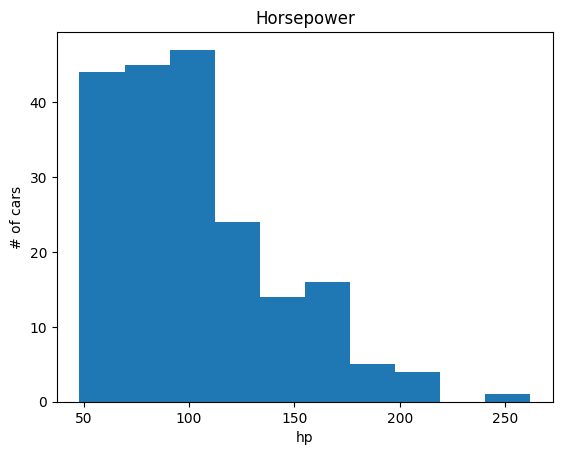

In [558]:
import matplotlib.pyplot as plt
plt.hist(a['horsepower'])
plt.title("Horsepower")
plt.xlabel("hp")
plt.ylabel("# of cars")

We would like 3 bins of equal size, so we use numpy's `linspace(start_value, end_value, numbers_generated)` function.
- Since we want to include the minimum value of horsepower, we want to set `start_value = min(df["horsepower"])`.
- Since we want to include the maximum value of horsepower, we want to set `end_value = max(df["horsepower"])`.
- Since we are building 3 bins of equal length, there should be 4 dividers, so `numbers_generated = 4`.

Create an array called `binns` using `linspace()`. These values will determine when one bin ends and another begins when applied to "horsepower".

In [559]:
start_value=min(a['horsepower'])
end_value=max(a['horsepower'])
numbers_generated=4
bins=np.linspace(start_value,end_value,numbers_generated)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Create a list of group names that we will set for each label. The three groups we want are low, meidum, and high.

In [560]:
names=['low','medium','high']

Create a new column called "horsepower-binned" using the `cut()` function with `pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)`. Print out the first 20 rows of "horsepower" and "horsepower-binned" to check your work. 

In [561]:
a['horsepower-binned']=pd.cut(a['horsepower'], bins, labels=names, include_lowest=True)
a[['horsepower','horsepower-binned']].head(20)


horsepower horsepower-binned
0        111.0               low
1        154.0            medium
2        102.0               low
3        115.0               low
4        110.0               low
5        110.0               low
6        110.0               low
7        140.0            medium
8        101.0               low
9        101.0               low
10       121.0            medium
11       121.0            medium
12       121.0            medium
13       182.0            medium
14       182.0            medium
15       182.0            medium
16        48.0               low
17        70.0               low
18        70.0               low
19        68.0               low

Check the number of vehicles in each bin using `value_counts()`.

In [562]:
a['horsepower-binned'].value_counts()

horsepower-binned
low       152
medium     43
high        5
Name: count, dtype: int64

Now, use let's make a histogram of our horsepower bins. The easiest way to do this is to use the `bar()` function like `bar(group_names, df["horsepower-binned"].value_counts())`. Make sure your graph has axis labels and a title.

<BarContainer object of 3 artists>

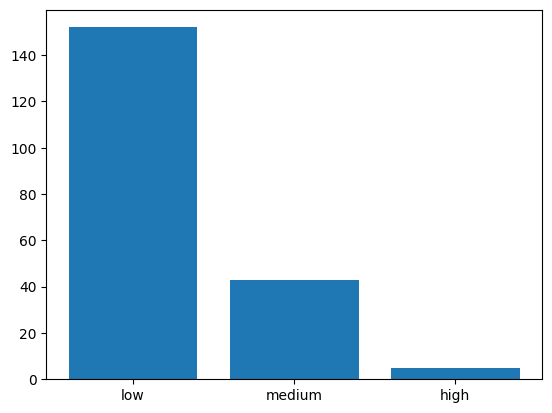

In [563]:
plt.bar(names, a['horsepower-binned'].value_counts())

Look at the graph above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). We successfully narrowed down the intervals from 59 to 3! Instead of making an entirely new column, you could have also made a quick visualization of these same bins by changing parameters in the `.hist()` method like `plt.hist(df["horsepower"], bins=3)`. 

(array([152.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

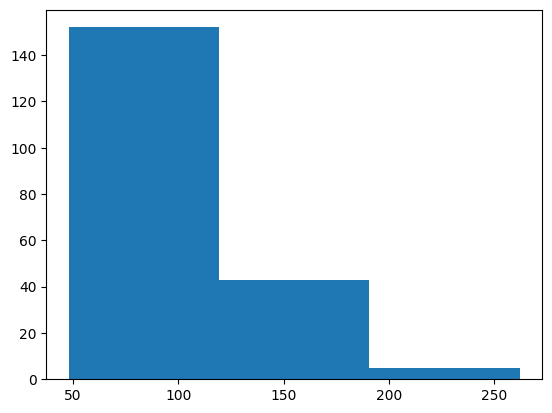

In [564]:
plt.hist(a['horsepower'],bins=3)

### Indicator variables (or dummy variables)
**What is an indicator variable?**
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

**Why we use indicator variables?**
We use indicator variables so we can use categorical variables for regression analysis in the later modules.

We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

Use pandas' method `get_dummies(column_name)` to assign numerical values to different categories of fuel type and assign it to a variable.


In [565]:
a = pd.concat([a,pd.get_dummies(a['fuel-type'])], axis=1)
a.drop('gas', axis=1)

symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            1              122.0  alfa-romero       gas        std   
2            2              164.0         audi       gas        std   
3            2              164.0         audi       gas        std   
4            2              122.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
195         -1               95.0        volvo       gas        std   
196         -1               95.0        volvo       gas      turbo   
197         -1               95.0        volvo       gas        std   
198         -1               95.0        volvo    diesel      turbo   
199         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
2           four        sedan          fwd           front        99.8  ...   
3           four        sedan          4wd           front        99.4  ...   
4            two        sedan          fwd           front        99.8  ...   
..           ...          ...          ...             ...         ...  ...   
195         four        sedan          rwd           front       109.1  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg  price  \
0                  9.0       111.0    5000.0        21          27  16500   
1                  9.0       154.0    5000.0        19          26  16500   
2                 10.0       102.0    5500.0        24          30  13950   
3                  8.0       115.0    5500.0        18          22  17450   
4                  8.5       110.0    5500.0        19          25  15250   
..                 ...         ...       ...       ...         ...    ...   
195                9.5       114.0    5400.0        23          28  16845   
196                8.7       160.0    5300.0        19          25  19045   
197                8.8       134.0    5500.0        18          23  21485   
198               23.0       106.0    4800.0        26          27  22470   
199                9.5       114.0    5400.0        19          25  22625   

     city-L/100km highway-L/100km  horsepower-binned  diesel  
0       11.190476        8.703704                low   False  
1       12.368421        9.038462             medium   False  
2        9.791667        7.833333                low   False  
3       13.055556       10.681818                low   False  
4       12.368421        9.400000                low   False  
..            ...             ...                ...     ...  
195     10.217391        8.392857                low   False  
196     12.368421        9.400000             medium   False  
197     13.055556       10.217391             medium   False  
198      9.038462        8.703704                low    True  
199     12.368421        9.400000                low   False  

[200 rows x 30 columns]

Change the column names to "fuel-type-gas" and "fuel-type-diesel" for clarity.


In [566]:
a.rename({'diesel':'fuel-type-diesel'}, axis=1, inplace=True)

Add the "dummy_variable" dataframe to your original dataframe `df` with pandas' `concat()` function. Then remove "fuel-type" from your dataframe.
```
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop('fuel-type', axis = 1, inplace = True)
```

In [567]:
a.drop(['gas','fuel-type'], axis=1, inplace=True)
a

symboling  normalized-losses         make aspiration num-of-doors  \
0            3              122.0  alfa-romero        std          two   
1            1              122.0  alfa-romero        std          two   
2            2              164.0         audi        std         four   
3            2              164.0         audi        std         four   
4            2              122.0         audi        std          two   
..         ...                ...          ...        ...          ...   
195         -1               95.0        volvo        std         four   
196         -1               95.0        volvo      turbo         four   
197         -1               95.0        volvo        std         four   
198         -1               95.0        volvo      turbo         four   
199         -1               95.0        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0    convertible          rwd           front        88.6  0.811148  ...   
1      hatchback          rwd           front        94.5  0.822681  ...   
2          sedan          fwd           front        99.8  0.848630  ...   
3          sedan          4wd           front        99.4  0.848630  ...   
4          sedan          fwd           front        99.8  0.851994  ...   
..           ...          ...             ...         ...       ...  ...   
195        sedan          rwd           front       109.1  0.907256  ...   
196        sedan          rwd           front       109.1  0.907256  ...   
197        sedan          rwd           front       109.1  0.907256  ...   
198        sedan          rwd           front       109.1  0.907256  ...   
199        sedan          rwd           front       109.1  0.907256  ...   

     compression-ratio  horsepower  peak-rpm city-mpg highway-mpg  price  \
0                  9.0       111.0    5000.0       21          27  16500   
1                  9.0       154.0    5000.0       19          26  16500   
2                 10.0       102.0    5500.0       24          30  13950   
3                  8.0       115.0    5500.0       18          22  17450   
4                  8.5       110.0    5500.0       19          25  15250   
..                 ...         ...       ...      ...         ...    ...   
195                9.5       114.0    5400.0       23          28  16845   
196                8.7       160.0    5300.0       19          25  19045   
197                8.8       134.0    5500.0       18          23  21485   
198               23.0       106.0    4800.0       26          27  22470   
199                9.5       114.0    5400.0       19          25  22625   

    city-L/100km  highway-L/100km  horsepower-binned  fuel-type-diesel  
0      11.190476         8.703704                low             False  
1      12.368421         9.038462             medium             False  
2       9.791667         7.833333                low             False  
3      13.055556        10.681818                low             False  
4      12.368421         9.400000                low             False  
..           ...              ...                ...               ...  
195    10.217391         8.392857                low             False  
196    12.368421         9.400000             medium             False  
197    13.055556        10.217391             medium             False  
198     9.038462         8.703704                low              True  
199    12.368421         9.400000                low             False  

[200 rows x 29 columns]

The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


Similar to before, we follow the same steps to create indicator variables for the column "aspiration". Then use `concat()` to add your dummy variables back into the dataframe and remove the original column.

In [568]:
a = pd.concat([a,pd.get_dummies(a['aspiration'])], axis=1)
a.drop(['std','aspiration'], axis=1, inplace=True)
a

symboling  normalized-losses         make num-of-doors   body-style  \
0            3              122.0  alfa-romero          two  convertible   
1            1              122.0  alfa-romero          two    hatchback   
2            2              164.0         audi         four        sedan   
3            2              164.0         audi         four        sedan   
4            2              122.0         audi          two        sedan   
..         ...                ...          ...          ...          ...   
195         -1               95.0        volvo         four        sedan   
196         -1               95.0        volvo         four        sedan   
197         -1               95.0        volvo         four        sedan   
198         -1               95.0        volvo         four        sedan   
199         -1               95.0        volvo         four        sedan   

    drive-wheels engine-location  wheel-base    length     width  ...  \
0            rwd           front        88.6  0.811148  0.890278  ...   
1            rwd           front        94.5  0.822681  0.909722  ...   
2            fwd           front        99.8  0.848630  0.919444  ...   
3            4wd           front        99.4  0.848630  0.922222  ...   
4            fwd           front        99.8  0.851994  0.920833  ...   
..           ...             ...         ...       ...       ...  ...   
195          rwd           front       109.1  0.907256  0.956944  ...   
196          rwd           front       109.1  0.907256  0.955556  ...   
197          rwd           front       109.1  0.907256  0.956944  ...   
198          rwd           front       109.1  0.907256  0.956944  ...   
199          rwd           front       109.1  0.907256  0.956944  ...   

     horsepower  peak-rpm city-mpg highway-mpg  price city-L/100km  \
0         111.0    5000.0       21          27  16500    11.190476   
1         154.0    5000.0       19          26  16500    12.368421   
2         102.0    5500.0       24          30  13950     9.791667   
3         115.0    5500.0       18          22  17450    13.055556   
4         110.0    5500.0       19          25  15250    12.368421   
..          ...       ...      ...         ...    ...          ...   
195       114.0    5400.0       23          28  16845    10.217391   
196       160.0    5300.0       19          25  19045    12.368421   
197       134.0    5500.0       18          23  21485    13.055556   
198       106.0    4800.0       26          27  22470     9.038462   
199       114.0    5400.0       19          25  22625    12.368421   

     highway-L/100km  horsepower-binned  fuel-type-diesel  turbo  
0           8.703704                low             False  False  
1           9.038462             medium             False  False  
2           7.833333                low             False  False  
3          10.681818                low             False  False  
4           9.400000                low             False  False  
..               ...                ...               ...    ...  
195         8.392857                low             False  False  
196         9.400000             medium             False   True  
197        10.217391             medium             False  False  
198         8.703704                low              True   True  
199         9.400000                low             False   True  

[200 rows x 29 columns]

**Awesome!** Now we are done cleaning our data.

## Export your file
To move to the second part of the lab, we need to save our dataframe in a new file. Use the function `df.to_csv(file_name)` to save your dataframe to a new csv.


In [569]:
a.to_csv('a.csv')